# Introduction

In this Notebook, we provide you a step-by-step guide in learning about a data set, handling common data quality issues, and performing preprocessing. We will rely on [pandas](https://pandas.pydata.org/), a popular data analysis and manipulation library for Python.

We'll use a variant of a popular learning dataset every practitioner should be familiar with: Wine Magazine wine reviews.

# Step 1: Acquire Data

Using the Notebook sidebar, use the _Add Data_ button to search for the data set with the following URL, https://www.kaggle.com/datasets/pabloa/wine-magazine, and is titled Wine Magazine by Pablo Albani. (Note that this is a different dataset than the popular and semi-official [Wine Reviews](https://www.kaggle.com/datasets/zynicide/wine-reviews) data set.)

When complete, close the _Add Data_ panel and confirm that the data set appears in the sidebar under _Data - Input_.


# Step 2: Import **pandas**

While we could perform much of our data analysis and preprocessing from scratch with our own Python code, **[pandas](https://pandas.pydata.org/)** provides us with objects and functions for loading, analyzing and manipulating data. **pandas** is short for "Panel Data Analysis," and was created by Wes McKinney in 2008.

<div class="alert alert-block alert-danger">
<b>Please:</b> Do not just copy and paste the sample code in this notebook. Practice typing the code we provide in each code cell.
</div>

In the next code cell, import the **pandas** library, and, per convention, name it `pd` for short.

```python
import pandas as pd
```

Be sure to run the cell when you are done.


In [1]:
import pandas as pd

# Step 3: Get to Know **pandas**

**pandas** provides us with two important classes: DataFrame and Series. You can think of a DataFrame as a table, that we construct with columns of data, where each column has a title and a list of values. Try constructing a DataFrame with a Python dictionary, and inspecting it.

```python
pd.DataFrame({'Yes': [19, 21], 'No': [78, 2], 'Maybe': [3, 4]})
```


In [2]:
data = {'Yes': [19, 21], 'No': [78, 2], 'Maybe': [3, 4]}
df = pd.DataFrame(data)
print(df)

   Yes  No  Maybe
0   19  78      3
1   21   2      4


Here we have passed the DataFrame constructor a dictionary containing the key-value pairs of "column label" and column data, which were simple Python lists.

Behind the scenes, however, a DataFrame takes the data we give it and constructs each column as a Series. You can think of a Series as a column of data, but a Series can also just be any sequence of data. Try creating a simple Series and inspecting it.

```python
pd.Series([8, 6, 7, 5, 3, 0, 9])
```

In [3]:
my_series = pd.Series([8, 6, 7, 5, 3, 0, 'widget'])
print(my_series)

0         8
1         6
2         7
3         5
4         3
5         0
6    widget
dtype: object


### 💡 Knowledge Check 1

Q1. Recall our Exploration on types of data. Notice the `dtype` component of the code cell's output. What is the data type of the values in the Series above?

_The data type of the values in the Series above is integer._

Q2. Modify the code above, by replacing the `9` with the string `'widget'` and re-run the code cell. What is the data type now?

_The data type of the Series is now object._

If you only master one Python library for data analysis and machine learning, we encourage you to master every aspect of **pandas**. The time-saving features it provides have great value!
For now, let's use pandas to open and explore our data set.

# Step 4: Load Data from a File into a DataFrame

Let's use **pandas** to create a DataFrame from the data in a CSV file, using the `read_csv` method. (CSV files are humble and ubiquitous, and easily read, but pandas can load data from other sources too.)

```python
wine_reviews = pd.read_csv(path_to_file, sep=';')
```

Notice that we will pass a `sep` argument to `read_csv` - this is because the data author chose to use semicolons instead of commas between values. With out this argument, pandas would have a problem parsing the CSV file.

Try loading the file in the next code cell. We have defined a variable for the path, or location, of the wine magazine data you added to this notebook. Use it when invoking `read_csv`.

In [4]:
wine_reviews_path = "../input/wine-magazine/winemag-data_first150k.csv"
wine_reviews = pd.read_csv(wine_reviews_path, sep=';')


# Step 5: Explore the Data Set

Recall that two of the first characteristics of a dataset we should discover are the size, or number of data objects, and the width, or the number of dimensions. We can obtain that information with the `shape` attribute.

```python
wine_reviews.shape
```

In [5]:
wine_reviews.shape

(144037, 10)

### 💡 Knowledge Check 2

1. How many data objects are in the data set, and how many dimensions are there?

There are 144,037 data objects and 10 dimensions in the wine_review data set.

Now, let's inspect the `wine_reviews` DataFrame. Because a Jupyter Notebook will always help us inspect the last line of code in a code cell, we can just write one statement with `wine_reviews` in it.

```python
wine_reviews
```

In [6]:
wine_reviews

,country,designation,points,price,province,region_1,region_2,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez,92
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley,100
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi,94
4,France,La Brûlade,95.0,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude,94
...,...,...,...,...,...,...,...,...,...,...
144032,Italy,NaN,91.0,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Feudi di San Gregorio,84
144033,France,Cuvée Prestige,91.0,27.0,Champagne,Champagne,NaN,Champagne Blend,H.Germain,83
144034,Italy,Terre di Dora,91.0,20.0,Southern Italy,Fiano di Avellino,NaN,White Blend,Terredora,97
144035,France,Grand Brut Rosé,90.0,52.0,Champagne,Champagne,NaN,Champagne Blend,Gosset,89


Notice how the DataFrame includes an unlabeled index column, to identify each data object.

### 💡 Knowledge Check 3

Recall the importance of handling missing data, and common techniques for handling missing data.

1. Look carefully at the rendering of the DataFrame above, what do you believe the NaN indicators mean in two of the columns of data?

_NaN indicators mean Not a Number where it is often used to indicate missing or undefined values among a dataset. Also, it also means that there is no avaliable data provided for those fields in the rows of the data frame_

2. How might you react to the missing data in the **designation** column, and why?

_I might react to the handle missing data in **designation** column by removing the rows with the missing data, or replace the missing values with an appropiate value in order to avoid introducing bias or inaccuracies in analytics of data._

3. How might you address the problem of a large number of missing values in the **region_2** column, and why?

_I may address the problem of a large dataset of missing values in **region_2** by filling in the missing values with some other values based on the avaliable data. Using **region_1** may be useful to help decided whether or not **region_2** should be dropped._



Now that we know the size and dimensions of the data set, and that we have seen a sampling of the data objects, let us further characterize the data set with summary statistics. While we can do this ourselves with our own Python code, **pandas** makes this straightforward.

```python
wine_reviews.describe()
```

In [7]:
wine_reviews.describe()

,points,price,last_year_points
count,144032.000000,130641.000000,144037.000000
mean,87.873424,33.123399,89.998452
std,3.215821,36.368177,6.050240
min,80.000000,4.000000,80.000000
25%,86.000000,16.000000,85.000000
50%,88.000000,24.000000,90.000000
75%,90.000000,40.000000,95.000000
max,100.000000,2300.000000,100.000000


Notice how `describe` computes the summary statistics only for numeric features. Notice the different _count_ values - what do the differences in these numbers indicate?


To explore and summarize the categorical data in the data set, we can use **pandas** grouping features. We can use the `value_counts` method to summarize the categorical attributes. Let's start with country.

```python
wine_reviews.value_counts('country')
```



In [8]:
wine_reviews.value_counts('country')
len(wine_reviews.value_counts('country'))

48

### 💡 Knowledge Check 4

Using the`value_counts` method, answer the following questions.

1. How many countries are represented in the data set?

_There are 48 countries represented in the data set._

2. How many provinces are represented in the data set?

_There are 451 province represented in the data set._

3. How many varieties are represented in the data set?

_There are 623 variety represented in the data set._

# Step 6: Preprocessing

## Handling missing values

Based on our inspection so far, let us choose to remove the **region_2** feature, and remove any data objects that have a missing value. We can remove a column from a DataFrame using Python's `del` keyword and the syntactic sugar of dictionary-like syntax that **pandas** provides, via `del frame['col_name']`. We can remove all rows that contain at least one missing value with the DataFrame `dropna` method by passing it the named parameter `axis=0`.

Then, let's inspect the shape of the data after this processing, with `shape`.

```python
del wine_reviews['region_2']
wine_reviews = wine_reviews.dropna(axis=0)
wine_reviews.shape
```

In [9]:
del wine_reviews['region_2']
wine_reviews = wine_reviews.dropna(axis=0)
wine_reviews.shape

# Note: if you encouter a KeyError: 'region_2', then "Run All" the code in the notebook.
#       This is because the `del` operation mutates the DataFrame "in-place."

(73440, 9)

Notice how there is one less dimension in the dataset, and we are also left with only 73,440 data objects that have no missing values.

Let's use `describe` again to see the summary statistics again of this slightly 'cleaner' data set.

```python
wine_reviews.describe()
```

In [10]:
wine_reviews.describe()

,points,price,last_year_points
count,73440.000000,73440.000000,73440.000000
mean,88.209477,37.562895,90.008687
std,3.298495,36.507432,6.043388
min,80.000000,4.000000,80.000000
25%,86.000000,18.000000,85.000000
50%,88.000000,29.000000,90.000000
75%,91.000000,45.000000,95.000000
max,100.000000,2013.000000,100.000000


Let's view the first five rows of the DataFrame with the `head` method.

```python
wine_reviews.head()
```

In [11]:
wine_reviews.head()

,country,designation,points,price,province,region_1,variety,winery,last_year_points
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,94
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,92
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,100
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,94
4,France,La Brûlade,95.0,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,94


## Creating a Feature

Our dataset has two interesting dimensions: _points_ and *last_year_points*. One might imagine an experiment where we would like to determine if considering the difference between the current year _points_ and the *last_year_points* might enhance the prediction accuracy of a trained model. In order to train a model with the difference between the current year _points_ and the *last_year_points*, it would be handy if we had a new feature, *point_change* in our dataset, computed prior to training.

There are many "syntactically sexy" ways to use *pandas* to synthesize new features. One of these methods involves adding a new column using the `assign` method, and passing `assign` an expression to evaluate. (Behind the scenes, a `map` operation and `lambda` expression are used to compute the new values for every entry in the data set.)

```python
wine_reviews = wine_reviews.assign(point_change = wine_reviews.points - wine_reviews.last_year_points)
wine_reviews.head()
```

In [12]:
wine_reviews = wine_reviews.assign(point_change = wine_reviews.points - wine_reviews.last_year_points)
wine_reviews.head()

,country,designation,points,price,province,region_1,variety,winery,last_year_points,point_change
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,94,2.0
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,92,4.0
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,100,-4.0
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,94,2.0
4,France,La Brûlade,95.0,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,94,1.0


### 💡 Knowledge Check 5

Apply the ideas and examples in this notebook to create a new column in the dataset, named **points_normalized**. Ensure that the values in this new column represent the points values normalized between 0 and 1.

<div class="alert alert-block alert-info">
<b>Hint:</b> There are important clues in the data exploration within this Notebook about how you might want to implement this.
</div>

Implement your solution in the following code cell, and be sure to invoke `wine_reviews.head()` at the end, so we can inspect your new column.


In [13]:
wine_reviews = wine_reviews.assign(points_normalized = (wine_reviews.points - wine_reviews.points.min()) / (wine_reviews.points.max() - wine_reviews.points.min()))
wine_reviews.head()


,country,designation,points,price,province,region_1,variety,winery,last_year_points,point_change,points_normalized
0,US,Martha's Vineyard,96.0,235.0,California,Napa Valley,Cabernet Sauvignon,Heitz,94,2.0,0.80
1,Spain,Carodorum Selección Especial Reserva,96.0,110.0,Northern Spain,Toro,Tinta de Toro,Bodega Carmen Rodríguez,92,4.0,0.80
2,US,Special Selected Late Harvest,96.0,90.0,California,Knights Valley,Sauvignon Blanc,Macauley,100,-4.0,0.80
3,US,Reserve,96.0,65.0,Oregon,Willamette Valley,Pinot Noir,Ponzi,94,2.0,0.80
4,France,La Brûlade,95.0,66.0,Provence,Bandol,Provence red blend,Domaine de la Bégude,94,1.0,0.75


# Step 7: Data Visualization

Visualizing our data is an important part of exploring and characterizing a data set. While we can not spend significant time on data visualization in this course, know that **pandas** provides some wrapper functions around **[MatPlotLib](https://matplotlib.org/)**, to make it quick and easy to draw some useful data visualizations.

Let's try rendering a scatterplot of points versus prices, and see what we can infer by observing the data visualization. To do this, we can use the `plot` method, specify which dimensions in the data set to use for `x` and `y` axes of our visualization, and specify a `kind` of visualization to render.

```python
wine_reviews.plot(x='points', y='price', kind='scatter')
```


<AxesSubplot:xlabel='points', ylabel='price'>

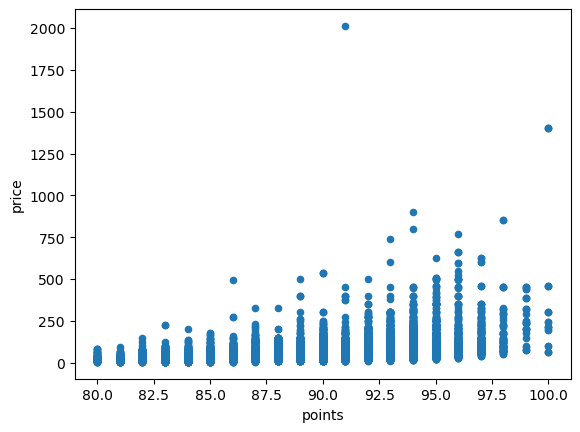

In [14]:
wine_reviews.plot(x='points', y='price', kind='scatter')


### 💡 Knowledge Check 6

There are many interesting characteristics of the data visualization above, that were not evident in our exploration of the data set so far. Try answering the following questions.

1. What are three interesting things about the data set that this data visualization seems to reveal?

_Three interesting things about the data set that this data visualization seems to reveal is that there is:_
1. _A positive correlation between the price and points of wine._
2. _A few outliers in the data, where wines have very high prices but not the most points._
3. _There are not many 100 point ratings of wine compare to those who come close to those points._

2. Consider the ideas in the Explorations in this week's module. Now, looking at the data visualization above, in what way are two of the data objects interesting? What might you do next?

_The first interesting data objects is the price of the wine hovering over 2000 dollars with a rating of around ~91, which is interesting to consider on why it is so expensive. Another interesting data object is that there are serveral wines rating around 86 to 100 with a price around or over 500 dollars._

_I want to investigate these objects further, and I could filter out the data set to include wines with certain characterisitics such as pricing, and ratings, or even both._

# Conclusion

This Notebook tells a story within an important part of the machine learning process. We hope this story ends in a bit of a cliff-hanger: we have discovered new characteristics about our data, and perhaps we have more preprocessing to do. Furthermore, after training our models, we will return to the preprocessing step to try to improve our data set with additional preprocessing. **This is the journey of the data wrangler.**


### 💡 Knowledge Check 7

In this notebook, we began this story by loading the data... and then what? Wrap up this notebook by writing a story that describes _what_ we did, _what_ we discovered, _why_ we did what we did, and what might be next. Don't just summarize the steps - identify the meaning behind the steps in our journey, and emphasize the _why_.

_In this notebook, we started by loading and exploring a dataset of wine reviews. We inspected the data, including its shape, data types, and values, and identified some areas of interest for further analysis. We then preprocessed the data by removing any missing values and creating a new feature, point_change, that may alter the model's accuracy. Then, we visualized our data using a scatterplot to gain insights into the relationship between wine price and rating. We also discovered interesting trends in the data, including the correlation between price and points, and the wide range of wine varieties and countries represented in the dataset._